In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
#plt.rc('font',serif='Times')

def line(w,b,x):
    y=-b/w[1]-x*w[0]/w[1]
    return y

w=np.array([[0.5],[-0.5]])
sigma=0.5
b=0
def data(N,sigma):
    X=sigma*np.random.randn(2,2*N) # Generate 2*N random vectors (gaussian) centered around zero
    mean=np.array([[1,-1],[-1,1]]) # define two means
    M=np.concatenate((np.tile(mean[:,0],(N,1)).T,np.tile(mean[:,1],(N,1)).T),axis=1)
    X=X+M
    y=np.concatenate((np.ones((1,N)),-np.ones((1,N))),axis=1) # concatenate labels
    return X, y

def mse(y_,y,N):
    e=np.sum(np.square(y_-y),0)/N
    return e
NTST=100
XTest,yTest =data(NTST,sigma)
XTest_= np.concatenate((XTest,np.ones((1,2*NTST))),axis=0)

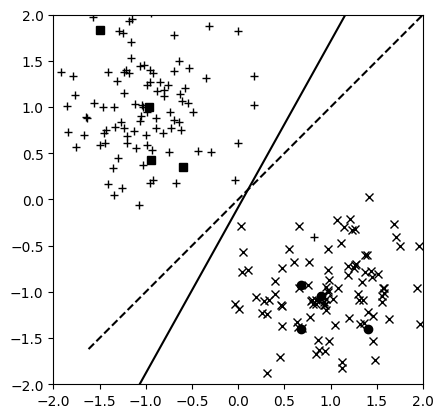

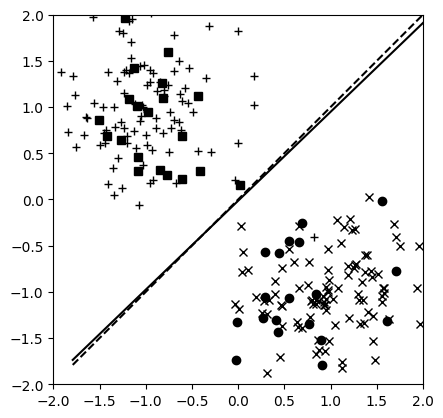

In [2]:
N=5
X,y=data(N,sigma)
X_= np.concatenate((X,np.ones((1,2*N))),axis=0)
W_MMSE=np.linalg.inv(X_@X_.T)@X_@y.T
w_MMSE=W_MMSE[:2,:]
b_MMSE=W_MMSE[-1,:]


indexn=np.where(y==-1)[1]
indexp=np.where(y==1)[1]
xmin=X.min()
xmax=X.max()
plt.plot(X[0,indexp], X[1,indexp], 'ko')
plt.plot(X[0,indexn], X[1,indexn], 'ks')

indexn=np.where(yTest==-1)[1]
indexp=np.where(yTest==1)[1]
plt.plot(XTest[0,indexp], XTest[1,indexp], 'kx')
plt.plot(XTest[0,indexn], XTest[1,indexn], 'k+')

plt.plot([xmin,xmax],[line(w,b,xmin),line(w,b,xmax)],'k--')
plt.plot([xmin,xmax],[line(w_MMSE,b_MMSE,xmin),line(w_MMSE,b_MMSE,xmax)],'k')
plt.axis([-2,2,-2,2])
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("../../Pictures/Ch_1/example_161_"+np.str(N)+"_.pdf")

plt.show()


N=20
X,y=data(N,sigma)
X_= np.concatenate((X,np.ones((1,2*N))),axis=0)
W_MMSE=np.linalg.inv(X_@X_.T)@X_@y.T
w_MMSE=W_MMSE[:2,:]
b_MMSE=W_MMSE[-1,:]


indexn=np.where(y==-1)[1]
indexp=np.where(y==1)[1]
xmin=X.min()
xmax=X.max()
plt.plot(X[0,indexp], X[1,indexp], 'ko')
plt.plot(X[0,indexn], X[1,indexn], 'ks')

indexn=np.where(yTest==-1)[1]
indexp=np.where(yTest==1)[1]
plt.plot(XTest[0,indexp], XTest[1,indexp], 'kx')
plt.plot(XTest[0,indexn], XTest[1,indexn], 'k+')

plt.plot([xmin,xmax],[line(w,b,xmin),line(w,b,xmax)],'k--')
plt.plot([xmin,xmax],[line(w_MMSE,b_MMSE,xmin),line(w_MMSE,b_MMSE,xmax)],'k')
plt.axis([-2,2,-2,2])
plt.gca().set_aspect('equal', adjustable='box')
#plt.savefig("../../Pictures/Ch_1/example_161_"+np.str(N)+"_.pdf")


plt.show()

In [3]:
N=100
No=2
ETest=np.zeros((N-No))
E=np.zeros((N-No))
Nr=10000
for j in range(Nr):
    for i in np.arange(No,N):
        X,y=data(i,sigma)
        XTest,yTest=data(N,sigma)
        X_= np.concatenate((X,np.ones((1,2*i))),axis=0)
        XTest_= np.concatenate((XTest,np.ones((1,2*N))),axis=0)
        W_MMSE=np.linalg.inv(X_@X_.T)@X_@y.T
        w_MMSE=W_MMSE[:2,:]
        b_MMSE=W_MMSE[-1,:]
        y_=X_.T@W_MMSE
        E[i-No]=E[i-No]+np.sum(np.not_equal(y,np.sign(y_.T)),1)/i
        yTest_=XTest_.T@W_MMSE
        ETest[i-No]=ETest[i-No]+np.sum(np.not_equal(yTest,np.sign(yTest_.T)),1)/N




C:\Users\aswathyr\AppData\Local\Temp\ipykernel_37944\4211940315.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  E[i-No]=E[i-No]+np.sum(np.not_equal(y,np.sign(y_.T)),1)/i
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_37944\4211940315.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ETest[i-No]=ETest[i-No]+np.sum(np.not_equal(yTest,np.sign(yTest_.T)),1)/N


<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_37944\1660116655.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("$\log_{10}(e)$",fontsize=20)


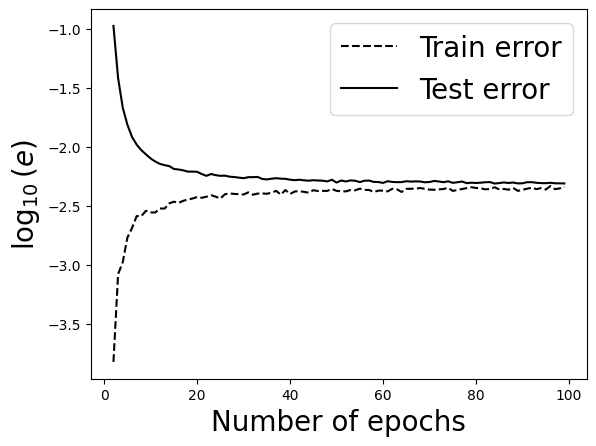

In [4]:

plt.plot(range(No,N),np.reshape(np.log10(E/Nr),N-No),'k--')
plt.plot(range(No,N),np.reshape(np.log10(ETest/Nr),N-No),'k')
plt.xlabel("Number of epochs",fontsize=20)
plt.ylabel("$\log_{10}(e)$",fontsize=20)
plt.legend(["Train error","Test error"],fontsize=20)
plt.axis("tight")
#plt.savefig("../../Pictures/Ch_1/example_161_train_test_error"+np.str(N)+"_.pdf")

plt.show()

In [5]:
np.log10(E[0]/Nr)

-3.8239087409443187

In [6]:
10**-3.5

0.00031622776601683794